# In Section 1 and 3 of Portfolio

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('data/rym_clean1.csv', index_col = 'position')
df.drop('Unnamed: 0',axis=1, inplace = True)
df['desc_list'] = df.descriptors.str.split(', ')
df['release_date'] = pd.to_datetime(df['release_date'])
df['Year'] = df['release_date'].dt.year

In [21]:
descs = []
for i, row in df.iterrows():
    descs.extend(row.loc['desc_list'])
descs = list(set(descs))
for n,i in enumerate(descs):
    new = i.strip(',...')
    descs[n] = new

descs = sorted(list(set(descs)))
    

In [36]:
d_ = []
d_count = []
d_nrates = []
d_nrevs = []
d_ars = []
for desc in descs:
    desc_df = df[df['desc_list'].apply(lambda x: desc in x)]
    d_.append(desc)
    d_count.append(desc_df['release_name'].count())
    d_nrates.append(desc_df['rating_count'].sum())
    d_nrevs.append(desc_df['review_count'].sum())
    d_ars.append(desc_df['avg_rating'].mean())

In [42]:
desc_df= pd.DataFrame({'Descriptor':d_, 'Number of Entries': d_count, 'Number of Ratings': d_nrates, 'Number of Reviews': d_nrevs, 'Average Rating': d_ars})
# desc_df

# vis

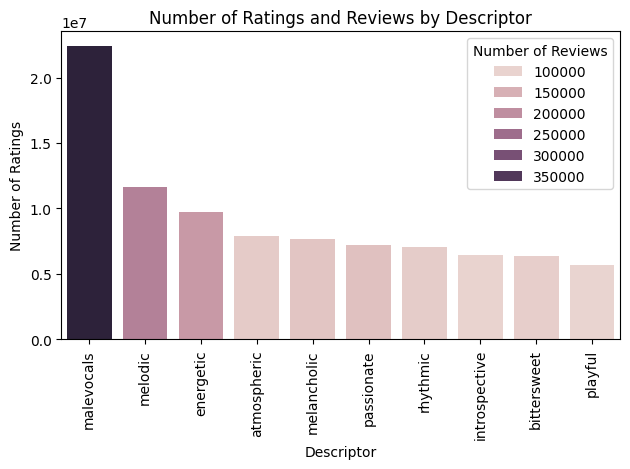

In [58]:
sns.barplot(desc_df.sort_values('Number of Ratings', ascending=False).iloc[:10], x = 'Descriptor', y = 'Number of Ratings', hue = 'Number of Reviews')
plt.xticks(rotation=90);
plt.title('Number of Ratings and Reviews by Descriptor')
plt.tight_layout()
plt.savefig('plots/desc/desc_rare')

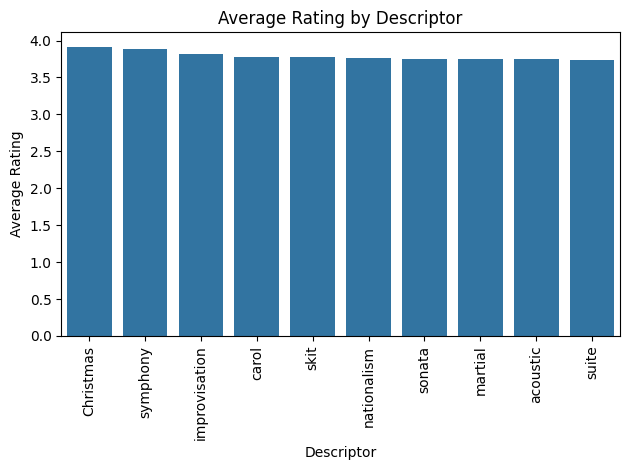

In [59]:
sns.barplot(desc_df.sort_values('Average Rating', ascending=False).iloc[:10], x = 'Descriptor', y = 'Average Rating')
plt.xticks(rotation=90);
plt.title('Average Rating by Descriptor')
plt.tight_layout()
plt.savefig('plots/desc/desc_avr')

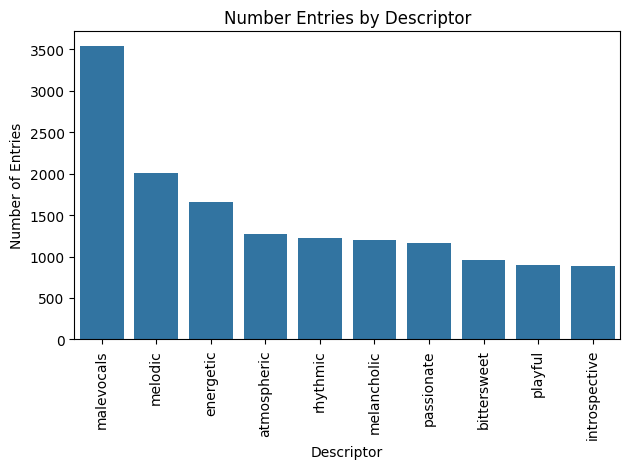

In [60]:
sns.barplot(desc_df.sort_values('Number of Entries', ascending=False).iloc[:10], x = 'Descriptor', y = 'Number of Entries')
plt.xticks(rotation=90);
plt.title('Number Entries by Descriptor')
plt.tight_layout()
plt.savefig('plots/desc/desc_ent')

# 3) Descriptor Trends

In [72]:
common_desc = desc_df.sort_values('Number of Entries', ascending=False).iloc[:20].Descriptor

In [96]:
desc_ser=[]
for desc in common_desc:
    desc_df = df[df.desc_list.apply(lambda x: desc in x)]
    groupd = desc_df[['Year','desc_list']].groupby('Year')['Year'].count()
    groupd.name = desc
    desc_ser.append(groupd)

ts_dc = pd.DataFrame(desc_ser).transpose()

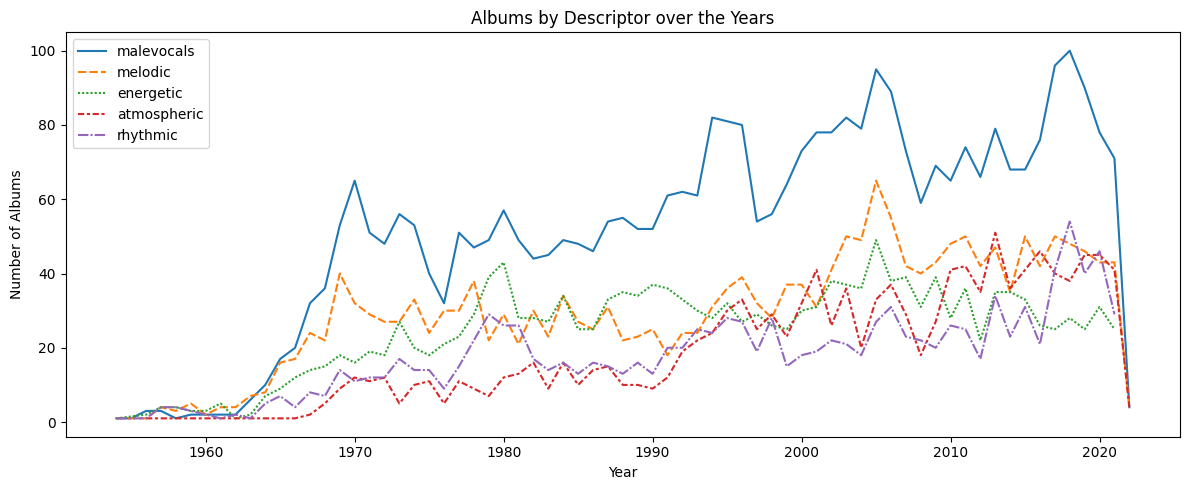

In [106]:
plt.figure(figsize=(12,5))
sns.lineplot(ts_dc.iloc[:,:5])
plt.ylabel('Number of Albums')
plt.title('Albums by Descriptor over the Years')
plt.tight_layout()
plt.savefig('plots/desc/desc_ts')

# plt.figure(figsize=(20,8))
# sns.lineplot(ts_dc.iloc[:,5:10])
# plt.ylabel('Number of Albums')
# plt.title('Albums by Descriptor over the Years')

# plt.figure(figsize=(20,8))
# sns.lineplot(ts_dc.iloc[:,10:15])
# plt.ylabel('Number of Albums')
# plt.title('Albums by Descriptor over the Years')

# plt.figure(figsize=(20,8))
# sns.lineplot(ts_dc.iloc[:,15:])
# plt.ylabel('Number of Albums')
# plt.title('Albums by Descriptor over the Years')